# Student Performance Indicator
## Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model
## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("raw.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of dataset

In [5]:
df.shape

(1002, 8)

## 2.2 Dataset information
1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score
## 3. Data Checks to perform
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column
## 3.1 Check Missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set
## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

2

##### There are no duplicates values in the data set
## 3.3 Check data types

In [8]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1002 non-null   object
 1   race_ethnicity               1002 non-null   object
 2   parental_level_of_education  1002 non-null   object
 3   lunch                        1002 non-null   object
 4   test_preparation_course      1002 non-null   object
 5   math_score                   1002 non-null   int64 
 6   reading_score                1002 non-null   int64 
 7   writing_score                1002 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.8+ KB


## 3.4 Unique values in each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.4 statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1002.000000,1002.000000,1002.000000
mean,66.110778,69.202595,68.089820
std,15.155758,14.604950,15.201606
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.750000,79.000000
max,100.000000,100.000000,100.000000


Mean for all three subjects is really close to each other like i.e between 66 and 68

THE same thing goes for STANDARD DEVIATION ranging from 14 to 15 

MINIMUM marks scored in  maths is 0 ,in reading it is 17 and writing it is 15

## 3.7 EXPLORING DATA

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable: " )
print(df['gender'].unique())

Categories in 'gender' variable: 
['female' 'male']


In [14]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" " )
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end=" " )
print(df['test_preparation_course'].unique())







Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [15]:
# define numerical & categorical columns
numerical= [feature for feature in df.columns if df[feature].dtype !="0"]
categorical= [feature for feature in df.columns if df[feature].dtype =="0"]

print("THERE are {} number of numerical features with value {}".format(len(numerical),numerical))
print("THERE are {} number of categorical features with value {}".format(len(categorical),categorical))

THERE are 8 number of numerical features with value ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']
THERE are 0 number of categorical features with value []


In [16]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding columns for "Total Score" and "Average"

In [18]:
df["Total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average"]=df["Total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df["reading_score"]==100]["Average"].count()
writing_full = df[df["writing_score"] ==100]["Average"].count()
math_full  =df[df["math_score"]==100]["Average"].count()

print("NO. of students that have got full marks in reading {}".format(reading_full))
print("NO. of students that have got full marks in writing {}".format(writing_full))
print("NO. of students that have got full marks in maths {}".format(math_full))
      

NO. of students that have got full marks in reading 17
NO. of students that have got full marks in writing 14
NO. of students that have got full marks in maths 7


In [20]:
reading_full

17

In [21]:
reading_less = df[df["reading_score"]<20]["Average"].count()
writing_less = df[df["writing_score"] <20]["Average"].count()
math_less  =df[df["math_score"]<20]["Average"].count()

print("NO. of students that have got less marks in reading {}".format(reading_less))
print("NO. of students that have got less marks in writing {}".format(writing_less))
print("NO. of students that have got less marks in maths {}".format(math_less))

NO. of students that have got less marks in reading 1
NO. of students that have got less marks in writing 3
NO. of students that have got less marks in maths 4


### Insights

From above values we get students have performed the worst in Maths

Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.

Histogram

Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

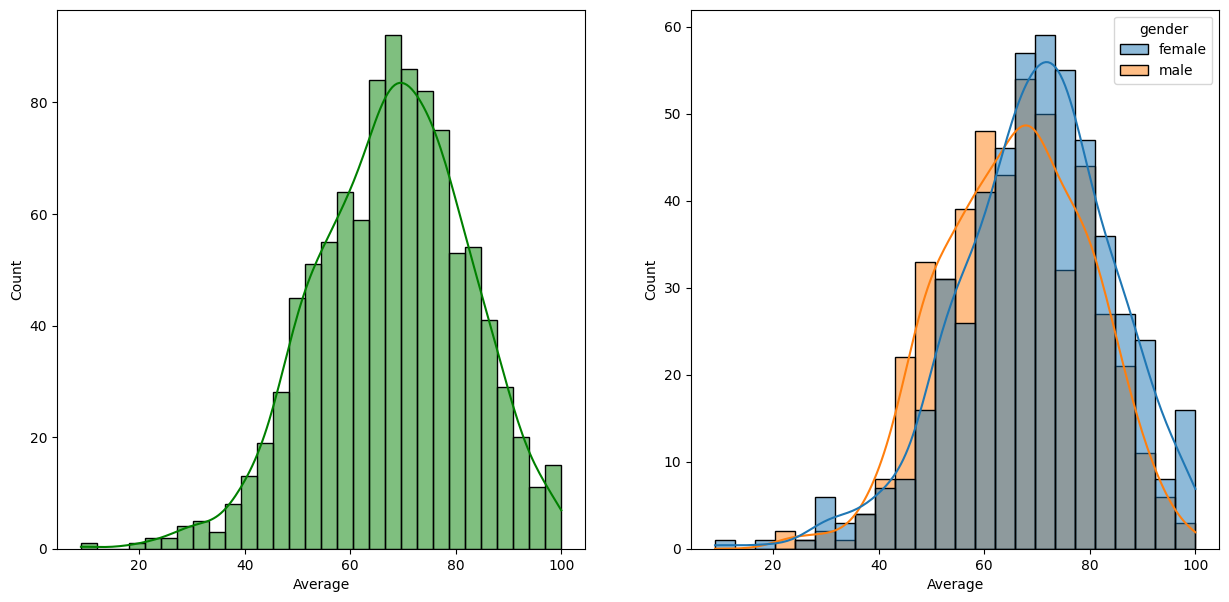

In [22]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
#fig,axs = plt.subplot(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x="Average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Average",hue="gender",kde=True)
plt.show()

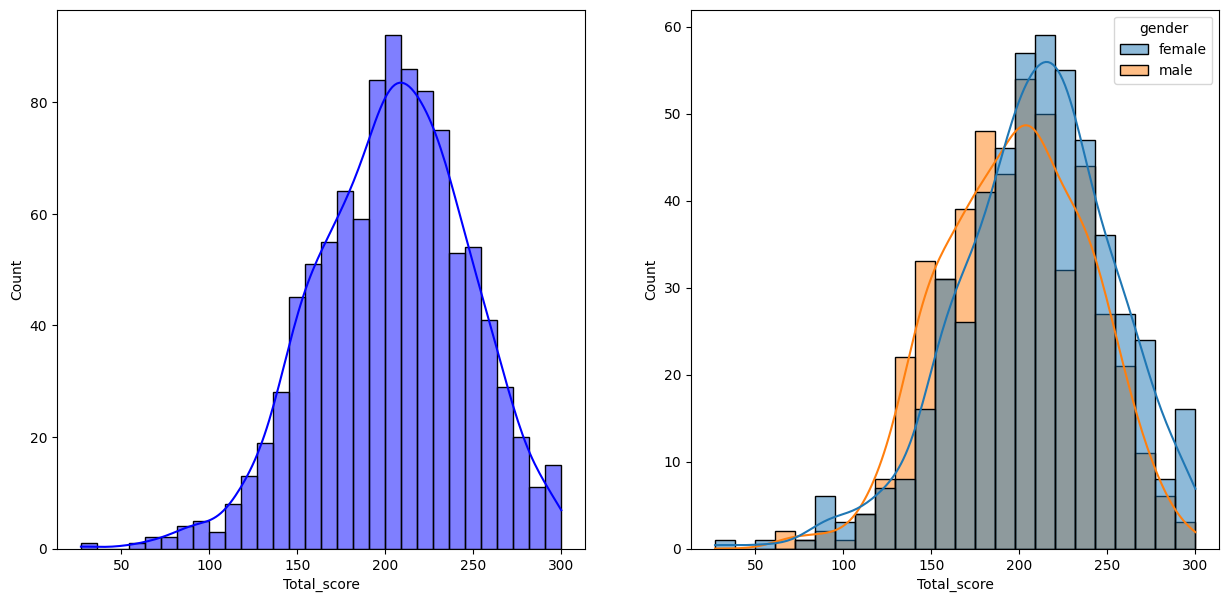

In [23]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Total_score",bins=30,color="b",kde=True)
plt.subplot(122)
sns.histplot(data=df,x="Total_score",hue="gender",kde=True)
plt.show()

### Insights

Female students tend to perform well then male students.


<Axes: xlabel='Average', ylabel='Count'>

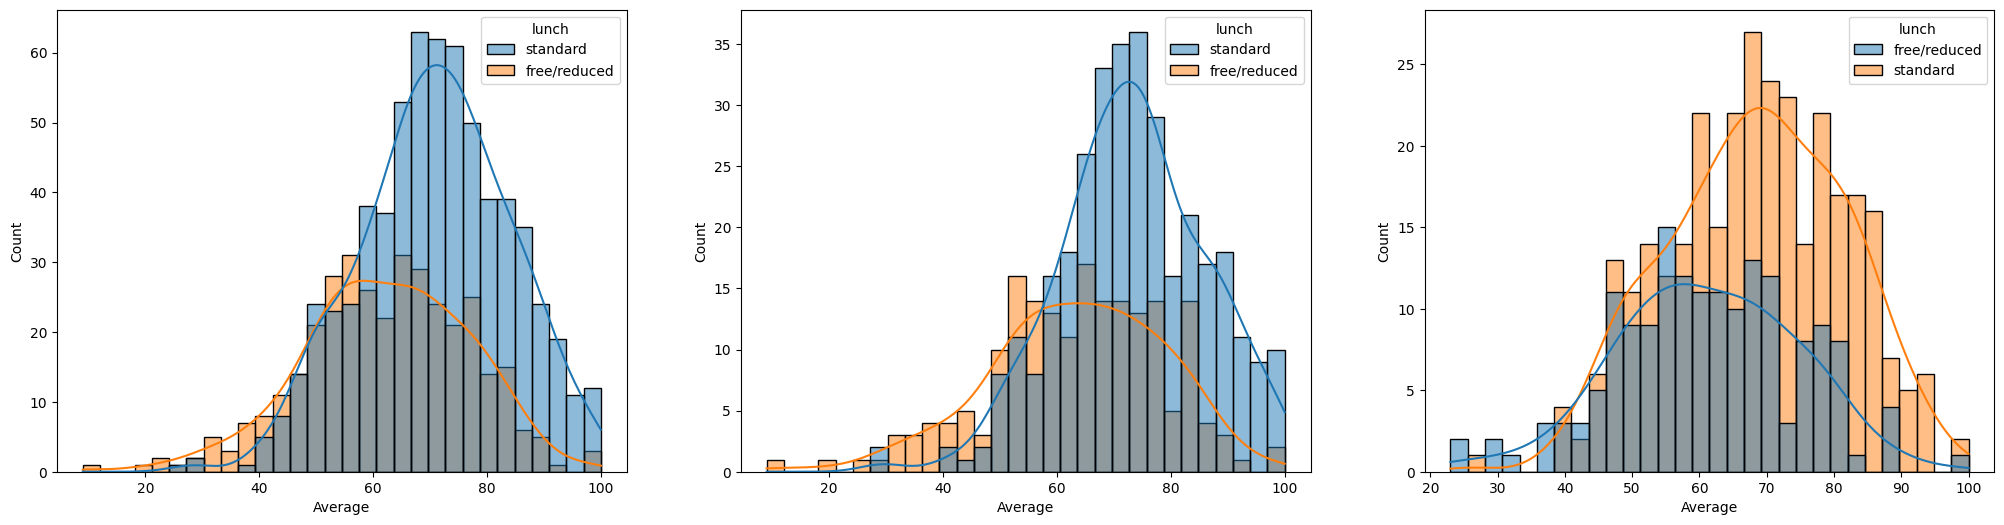

In [24]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="Average",bins=30,kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="Average",bins=30,kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="Average",bins=30,kde=True,hue="lunch")

#### Insights

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

<Axes: xlabel='Average', ylabel='Count'>

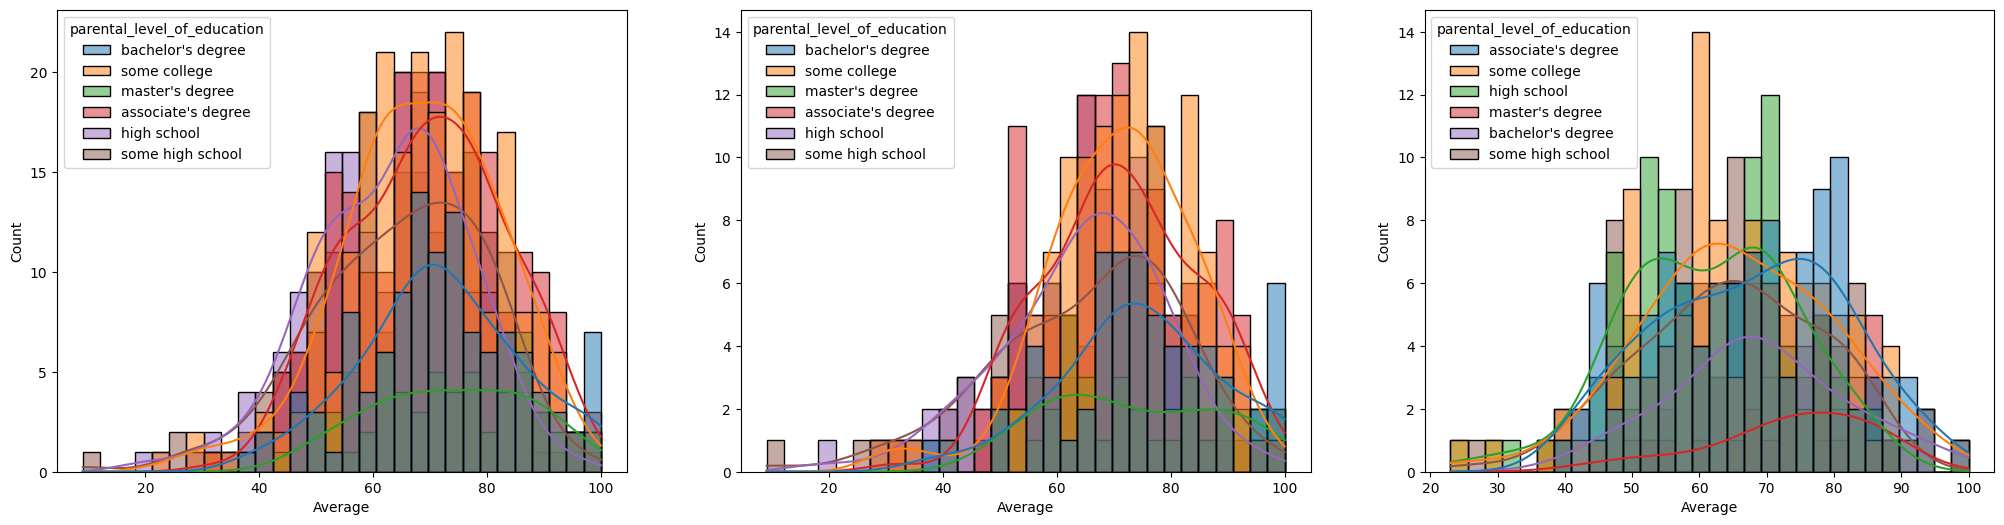

In [25]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="Average",bins=30,kde=True,hue="parental_level_of_education")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="Average",bins=30,kde=True,hue="parental_level_of_education")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="Average",bins=30,kde=True,hue="parental_level_of_education")

### Insights
In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their female child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on male students.

<Axes: xlabel='Average', ylabel='Count'>

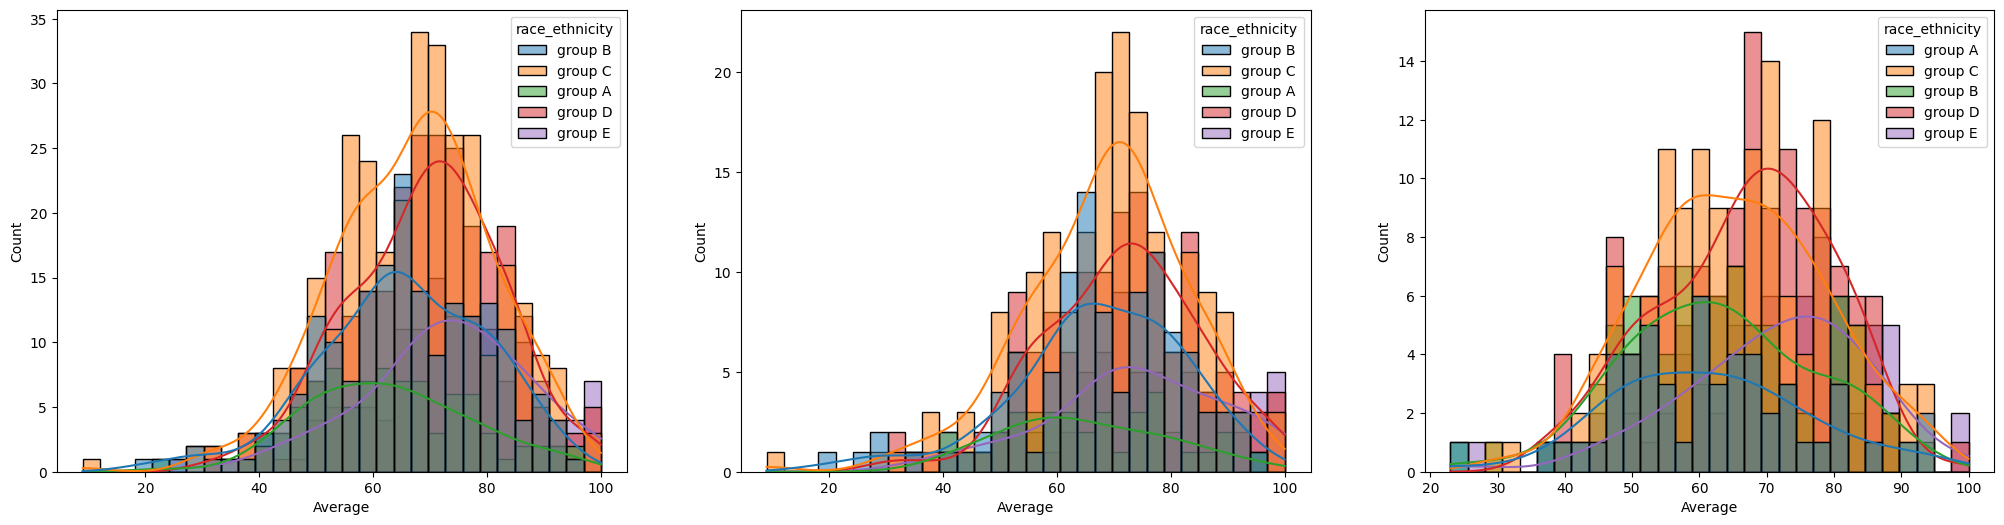

In [26]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="Average",bins=30,kde=True,hue="race_ethnicity")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="Average",bins=30,kde=True,hue="race_ethnicity")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="Average",bins=30,kde=True,hue="race_ethnicity")

### Insights

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<Axes: xlabel='Average', ylabel='Count'>

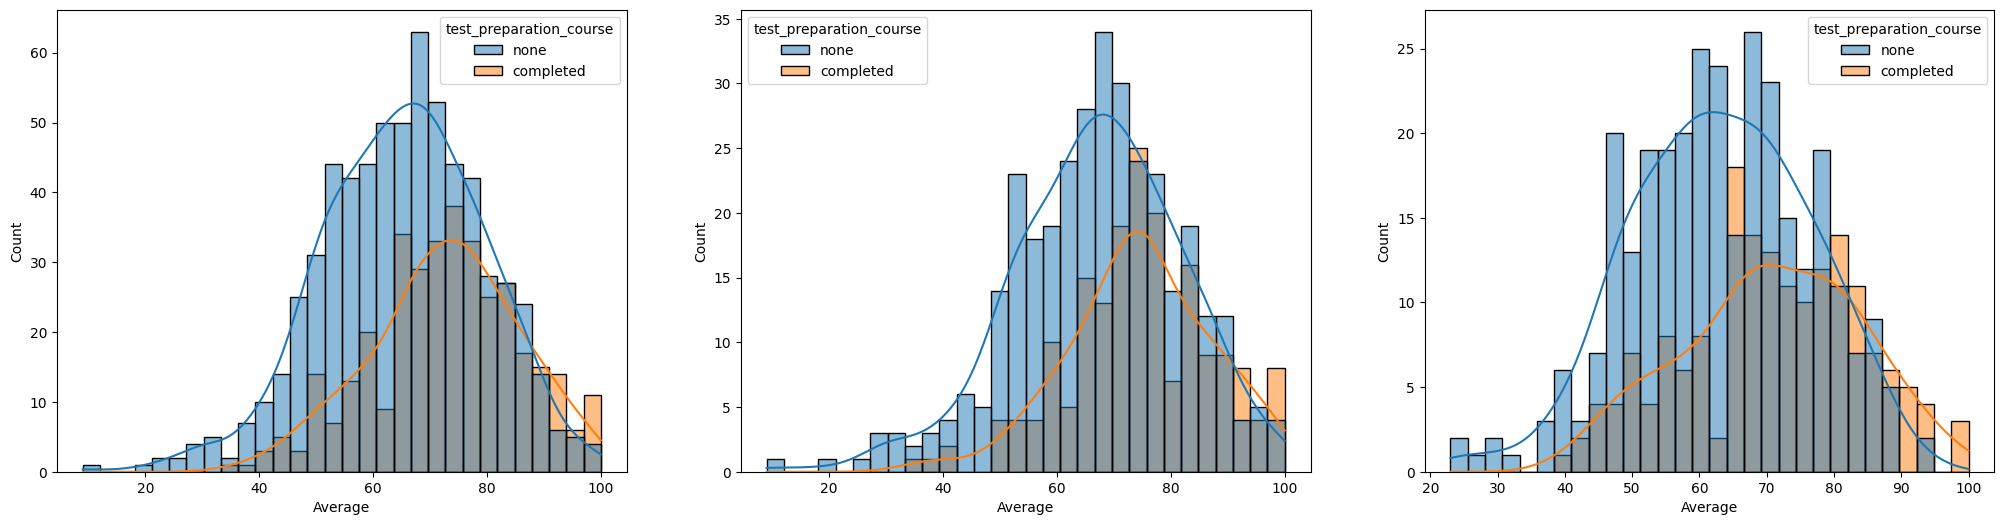

In [27]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="Average",bins=30,kde=True,hue="test_preparation_course")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="Average",bins=30,kde=True,hue="test_preparation_course")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="Average",bins=30,kde=True,hue="test_preparation_course")

### 4.2 Maximumum score of students in all three subjects

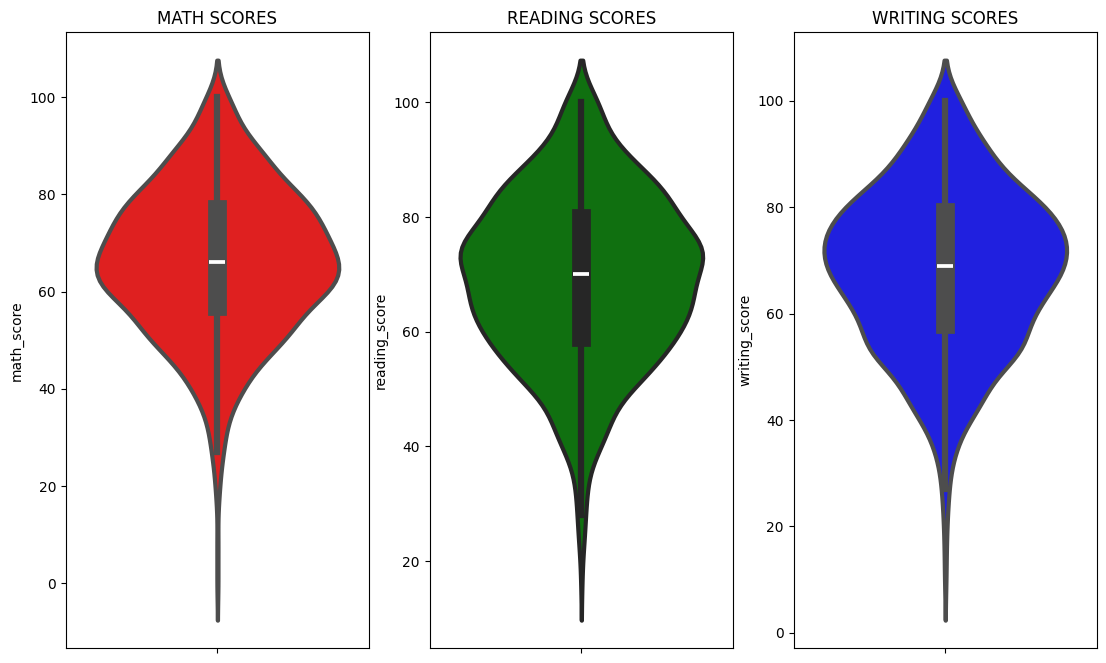

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

## Insights

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [29]:
#Categories in 'gender' variable:  ['female' 'male']
#Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
#Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree" 'high school' 'some high school']
#Categories in lunch' variable:  ['standard' 'free/reduced']
#Categories in 'test_preparation_course' variable:  ['none' 'completed']

## 4.3 Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

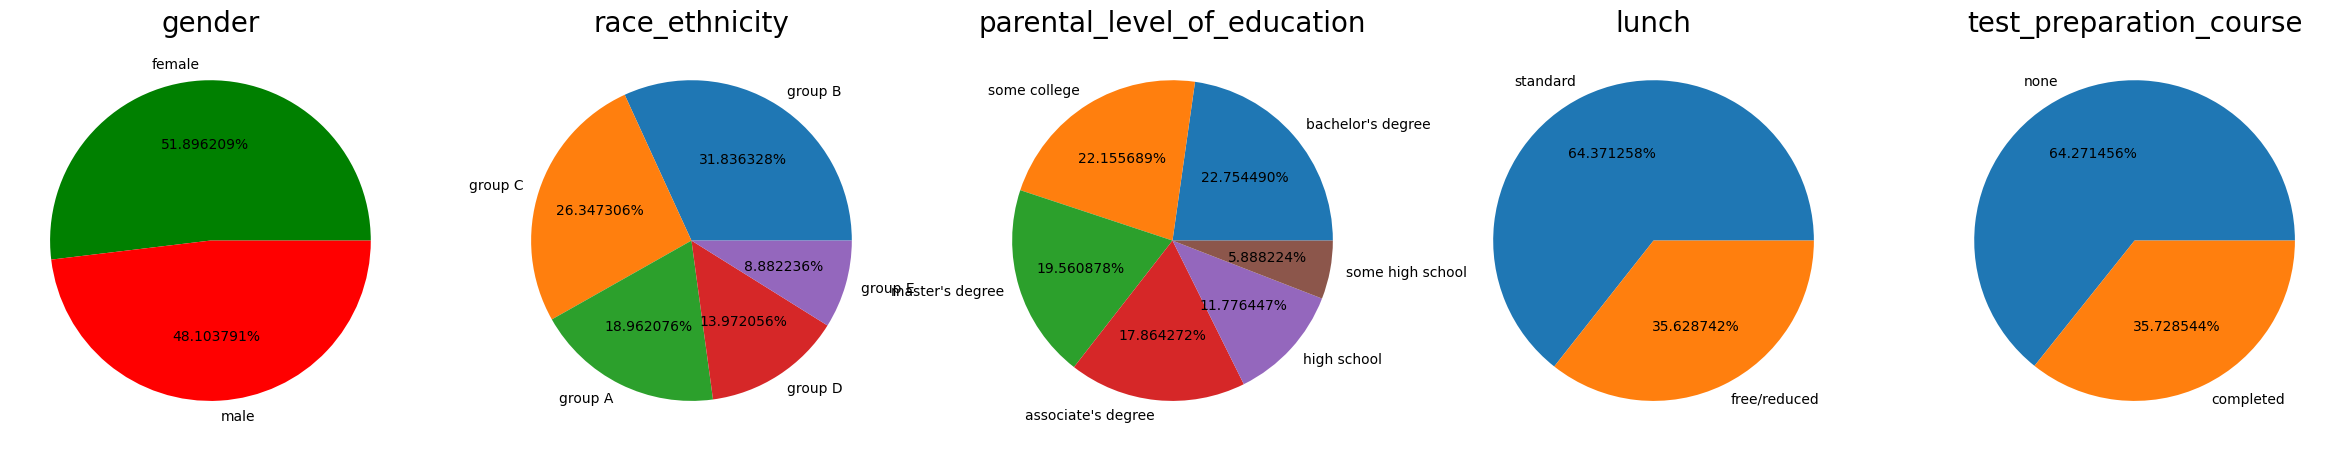

In [30]:
plt.rcParams['figure.figsize'] = (30, 15)

plt.subplot(151)
size=df["gender"].value_counts()
labels="female","male"
color=["green","red"]
plt.pie(size,labels = labels,colors= color,autopct="%2f%%")
plt.title("gender",fontsize=20)
plt.axis("off")

plt.subplot(152)
size=df["race_ethnicity"].value_counts()
labels= 'group B','group C', 'group A', 'group D', 'group E'
plt.pie(size,labels = labels,autopct="%2f%%")
plt.title("race_ethnicity",fontsize=20)
plt.axis("off")

plt.subplot(153)
size=df["parental_level_of_education"].value_counts()
labels= "bachelor's degree" ,'some college' ,"master's degree", "associate's degree", 'high school' ,'some high school'
plt.pie(size,labels = labels,autopct="%2f%%")
plt.title("parental_level_of_education",fontsize=20)
plt.axis("off")

plt.subplot(154)
size=df["lunch"].value_counts()
labels='standard', 'free/reduced'
plt.pie(size,labels = labels,autopct="%2f%%")
plt.title("lunch",fontsize=20)
plt.axis("off")


plt.subplot(155)
size=df["test_preparation_course"].value_counts()
labels='none' ,'completed'
plt.pie(size,labels = labels,autopct="%2f%%")
plt.title("test_preparation_course",fontsize=20)
plt.axis("off")
    

## Insights
1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
## 4.4 Feature Wise Visualization
## 4.4.1 GENDER COLUMN

How is distribution of Gender ?

Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

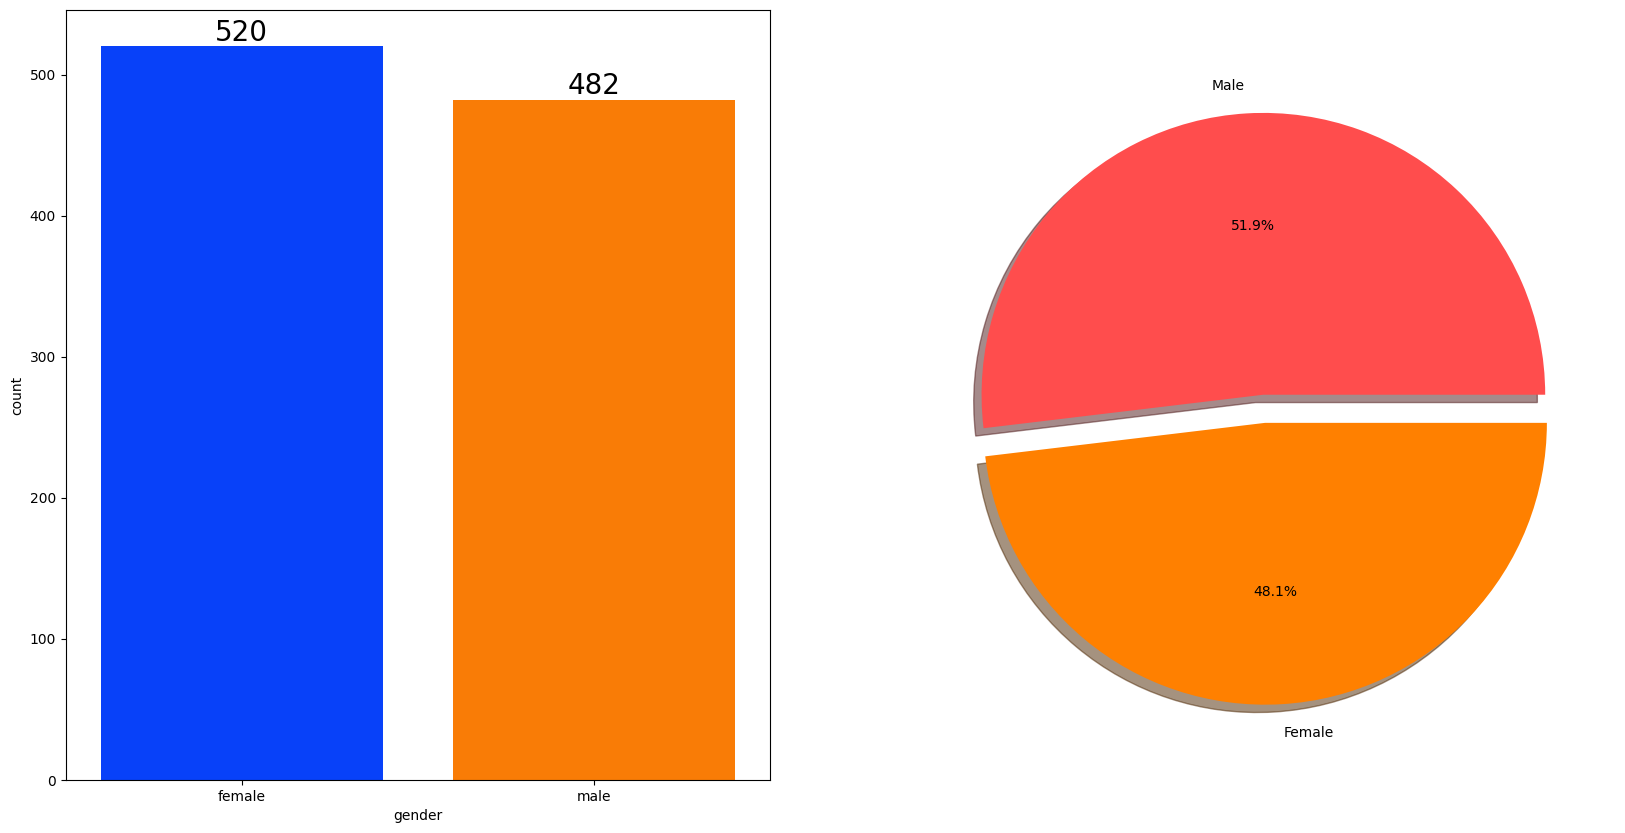

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Insights
1. Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)
### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [32]:
gender_group = df.groupby("gender").mean()
gender_group

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup Dgroup Dgroup D to numeric

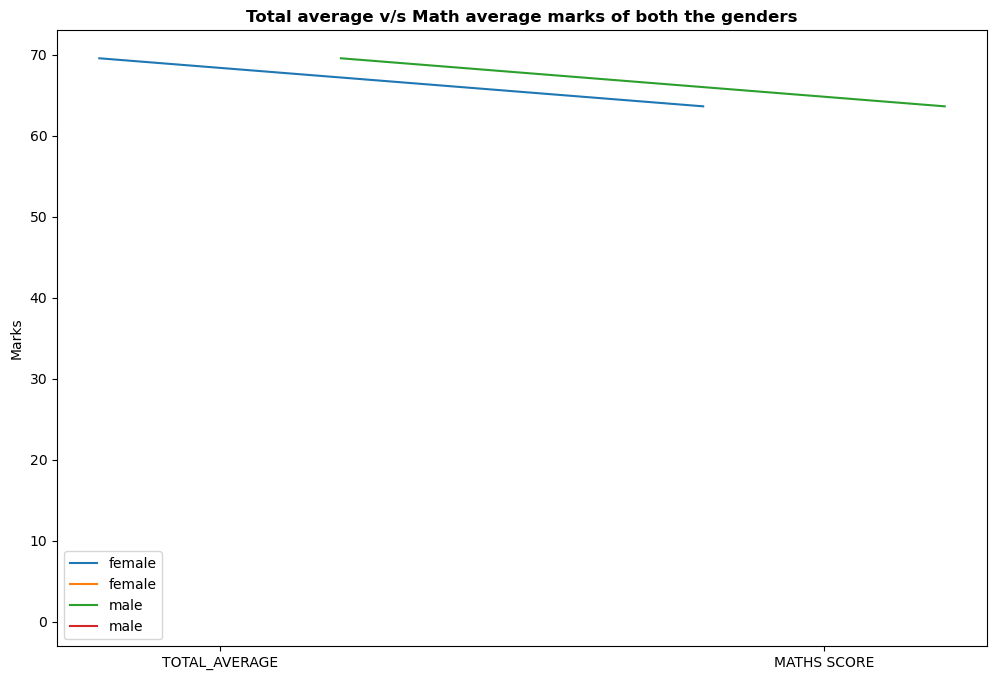

In [ ]:
plt.figure(figsize=(12,8))

X = ["TOTAL_AVERAGE","MATHS SCORE"]

female_score= [gender_group["Average"][0],gender_group["math_score"][0]]
male_score= [gender_group["Average"][1],gender_group["math_score"][1]]

x_axis = np.arange(len(X))

plt.plot(x_axis - 0.2,female_score,0.4,label="female")
plt.plot(x_axis + 0.2,female_score,0.4,label="male")

plt.xticks(x_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insights

On an average females have a better overall score than men.

whereas males have scored higher in Maths.

## 4.4.2 RACE/EHNICITY COLUMN
How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?
UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

In [ ]:
#Categories in 'gender' variable:  ['female' 'male']
#Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
#Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree" 'high school' 'some high school']
#Categories in lunch' variable:  ['standard' 'free/reduced']
#Categories in 'test_preparation_course' variable:  ['none' 'completed']

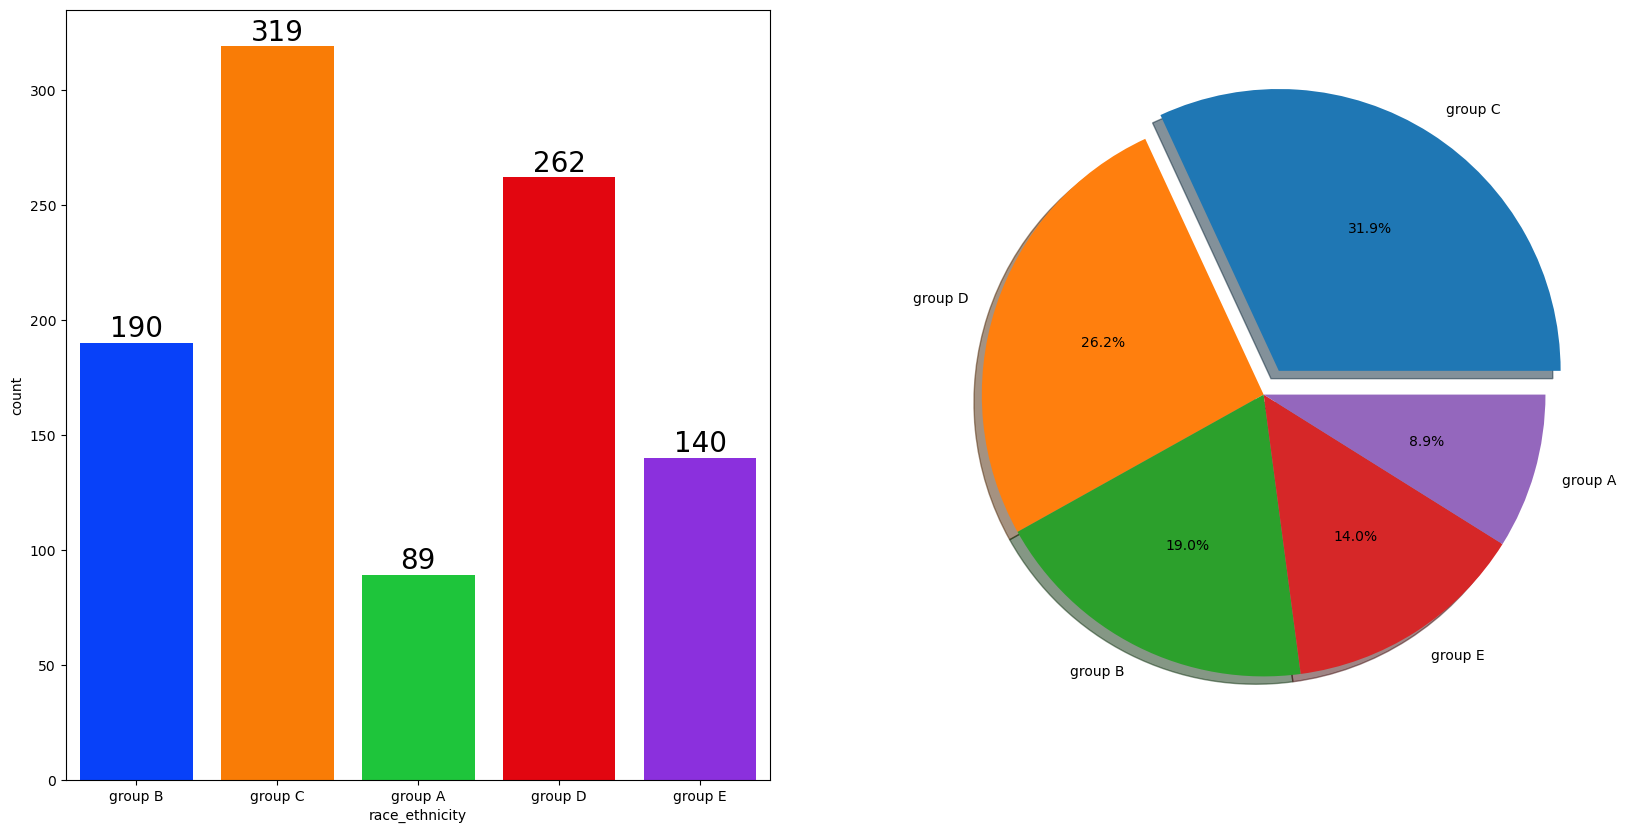

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

## Insights
1. Most of the student belonging from group C /group D.
2. Lowest number of students belong to groupA.
#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

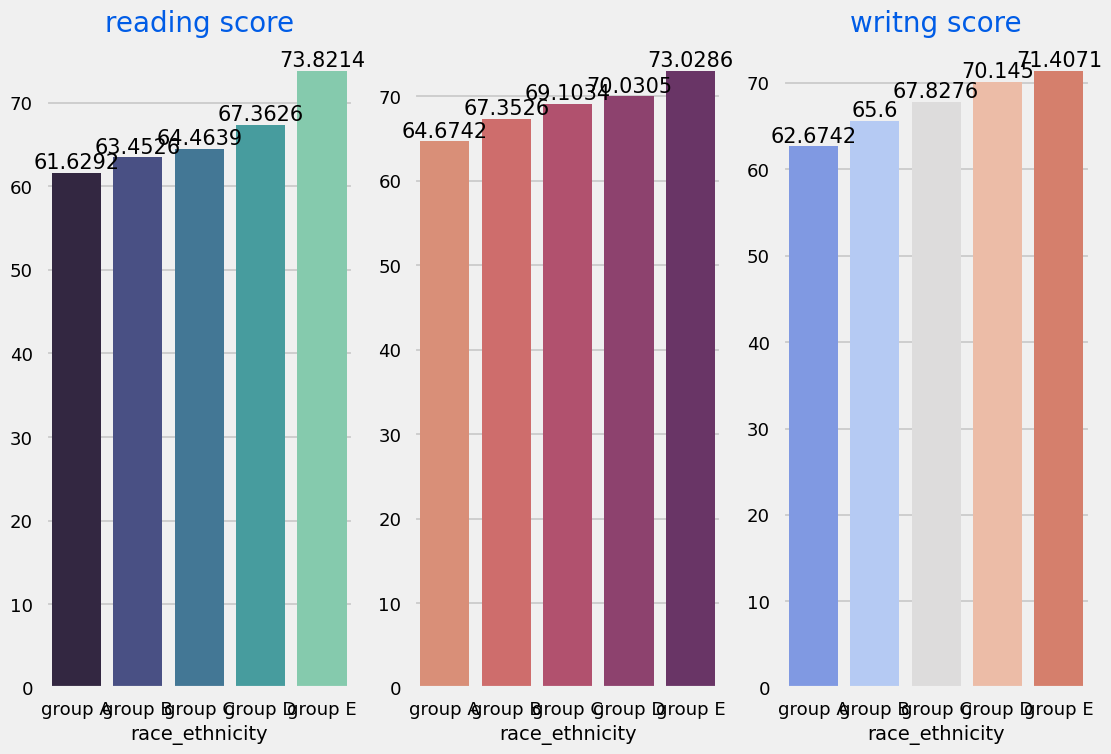

In [ ]:
group_data= df.groupby("race_ethnicity")
f,ax = plt.subplots(1,3,figsize=(12,8))

sns.barplot(x=group_data["math_score"].mean().index,y=group_data["math_score"].mean().values,palette="mako",ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
    
sns.barplot(x=group_data["reading_score"].mean().index,y=group_data["reading_score"].mean().values,palette="flare",ax=ax[1])
ax[0].set_title('reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
    
sns.barplot(x=group_data["writing_score"].mean().index,y=group_data["writing_score"].mean().values,palette="coolwarm",ax=ax[2])
ax[2].set_title('writng score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)    
    

#### Insights
1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a lower avg in all course subjects
#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

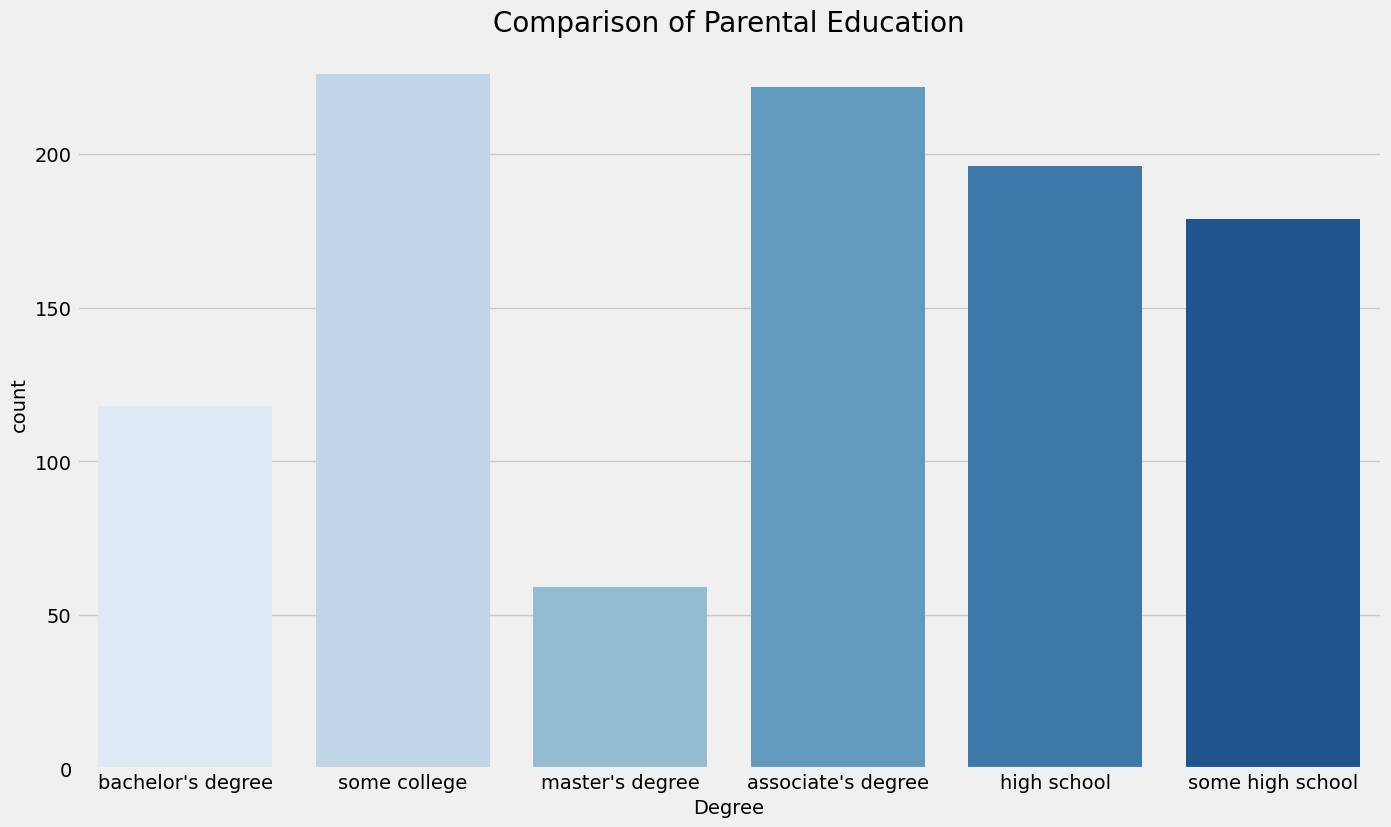

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],data=df, palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights

Largest number of parents are from some college.

##### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

<Axes: xlabel='parental_level_of_education'>

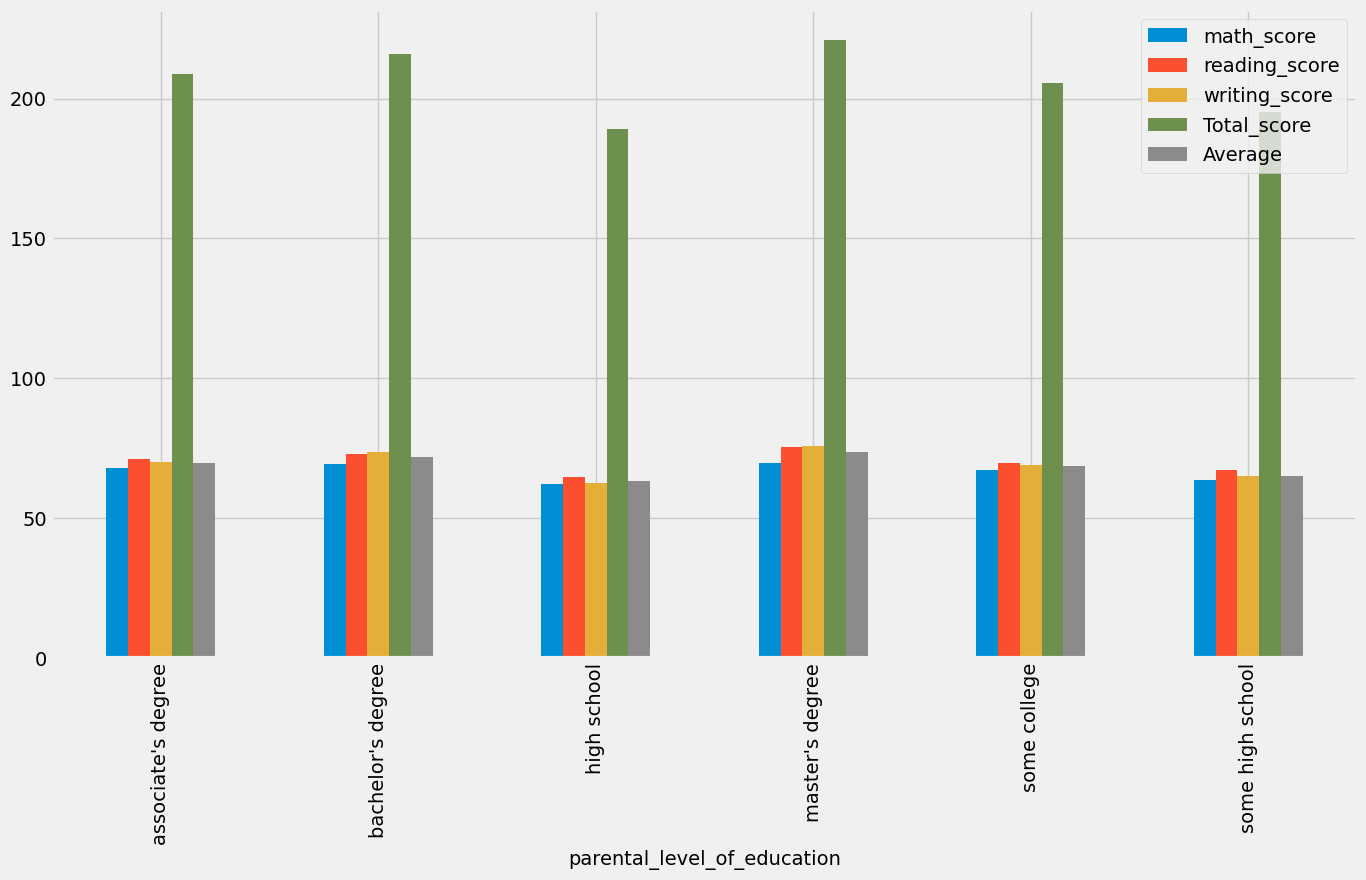

In [ ]:
df.groupby("parental_level_of_education").agg("mean").plot(kind ="bar",figsize=(15,8))

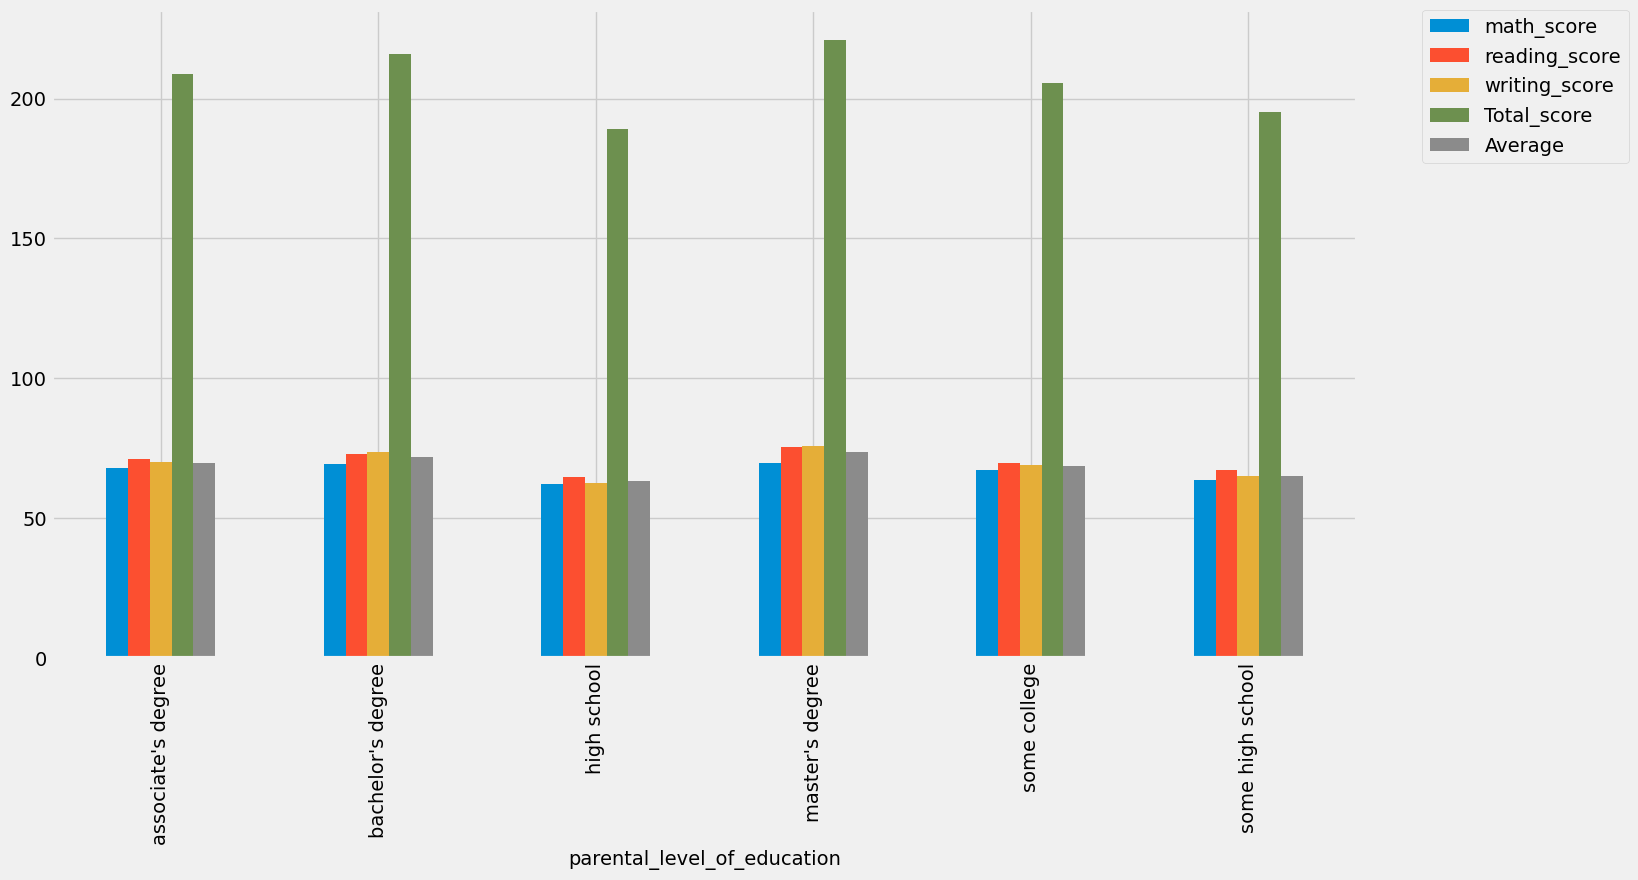

In [38]:
df.groupby("parental_level_of_education").agg("mean").plot(kind ="bar",figsize=(15,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

###  Insights

The score of student whose parents possess master and bachelor level education are higher than others.

##### 4.4.4 LUNCH COLUMN
1. Which type of lunch is most common amoung students ?
2. What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

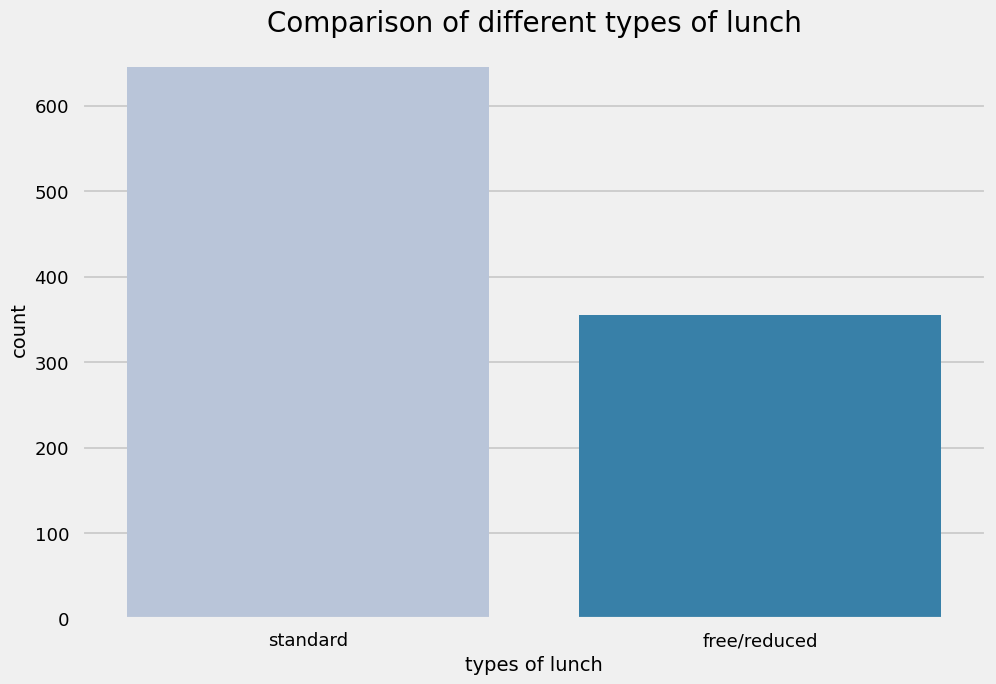

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],data=df, palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


### Insights

Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

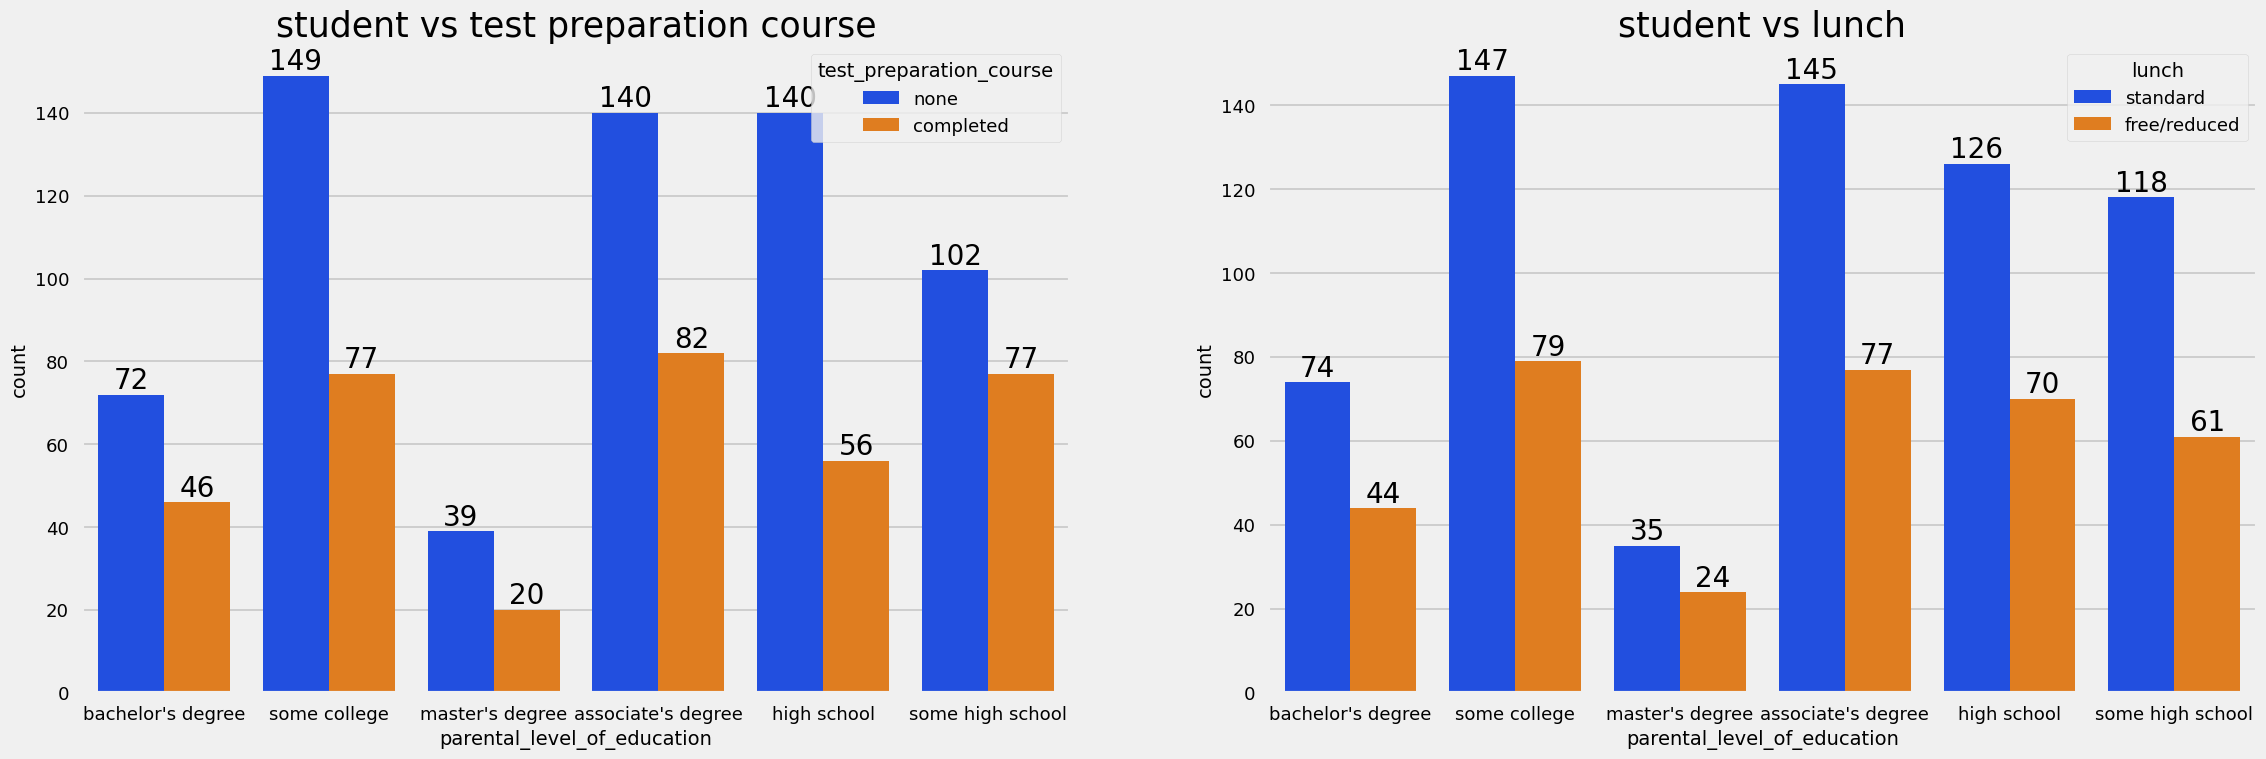

In [40]:
f,ax  =plt.subplots(1,2,figsize=(25,8))
sns.countplot(x=df["parental_level_of_education"],data=df,palette="bright",hue="test_preparation_course",saturation=0.75,ax=ax[0])
ax[0].set_title("student vs test preparation course",color="black",size=25)

for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)
    

sns.countplot(x=df["parental_level_of_education"],data=df,palette="bright",hue="lunch",saturation=0.75,ax=ax[1])
ax[1].set_title("student vs lunch",color="black",size=25)

for container in ax[1].containers:
    ax[1].bar_label(container,color="black",size=20)    
    
              

### Insights

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN

Which type of lunch is most common amoung students ?

Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='reading_score'>

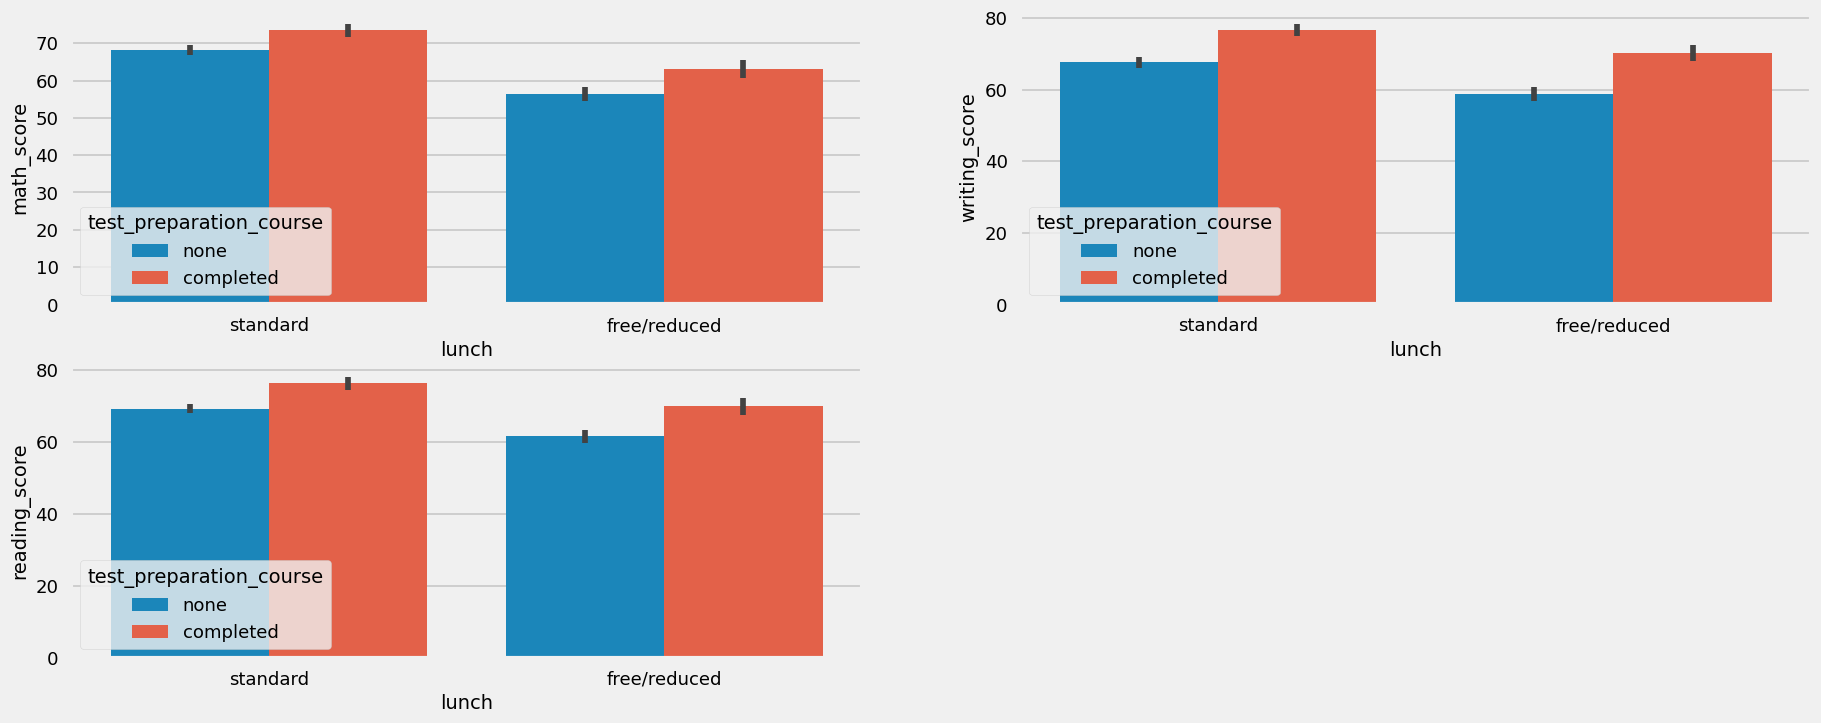

In [41]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.barplot(x=df["lunch"],data=df,hue="test_preparation_course",y=df["math_score"])

plt.subplot(2,2,2)
sns.barplot(x=df["lunch"],data=df,hue="test_preparation_course",y=df["writing_score"])

plt.subplot(2,2,3)
sns.barplot(x=df["lunch"],data=df,hue="test_preparation_course",y=df["reading_score"])


###  Insights

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

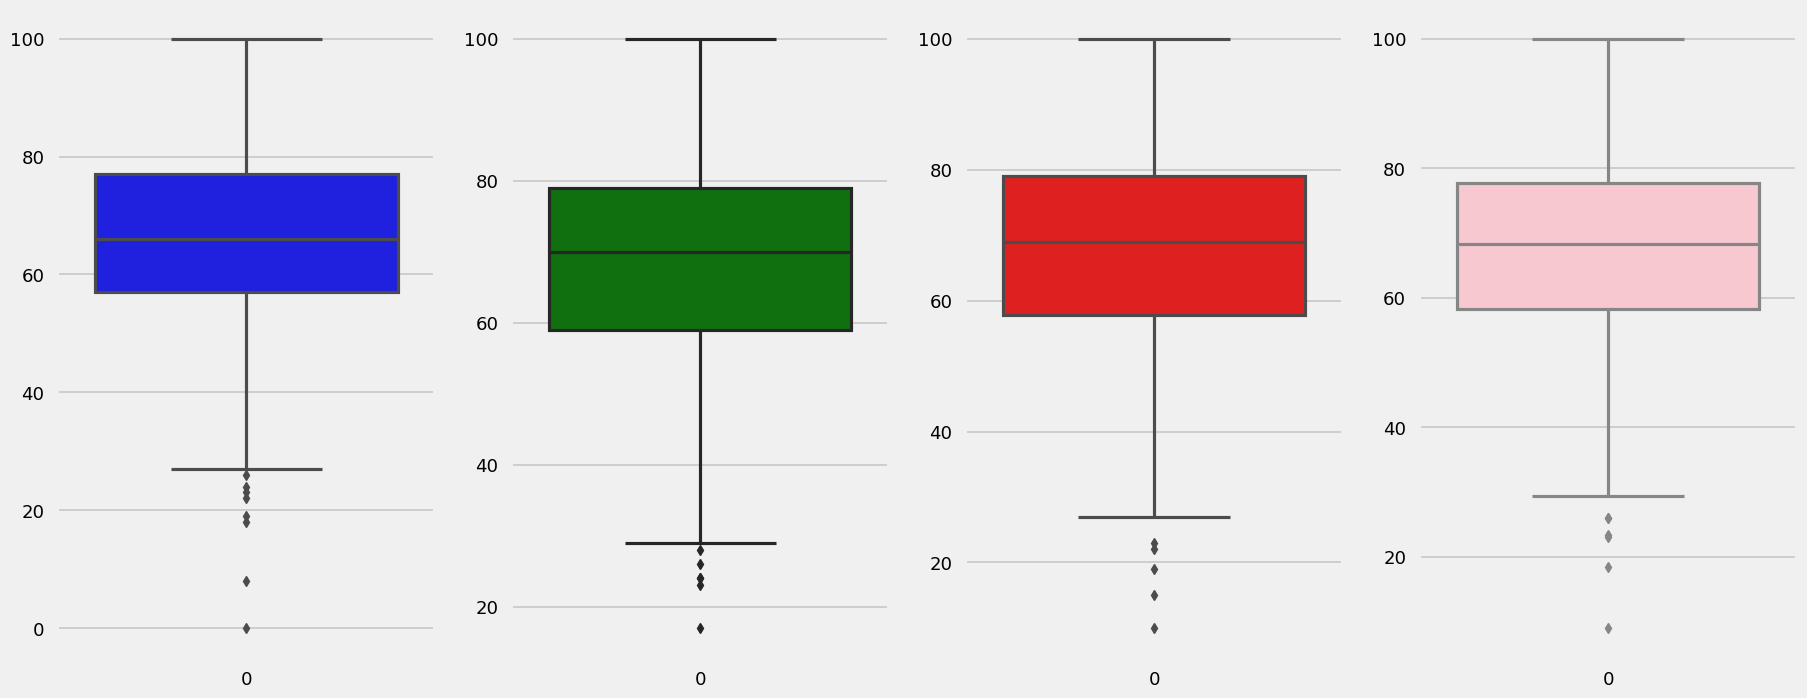

In [42]:
plt.subplots(1,4,figsize=(20,8))
plt.subplot(1,4,1)
sns.boxplot(df["math_score"],color="blue")
plt.subplot(1,4,2)
sns.boxplot(df["reading_score"],color="green")
plt.subplot(1,4,3)
sns.boxplot(df["writing_score"],color="red")
plt.subplot(1,4,4)
sns.boxplot(df["Average"],color="pink")
plt.show()

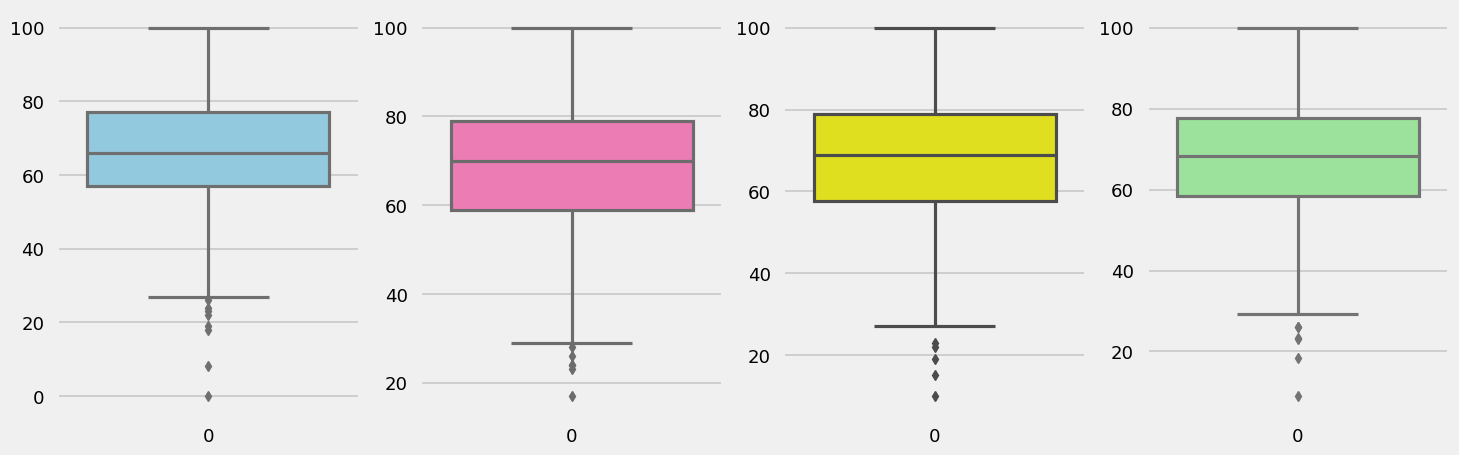

TypeError: boxplot() got an unexpected keyword argument 'color'

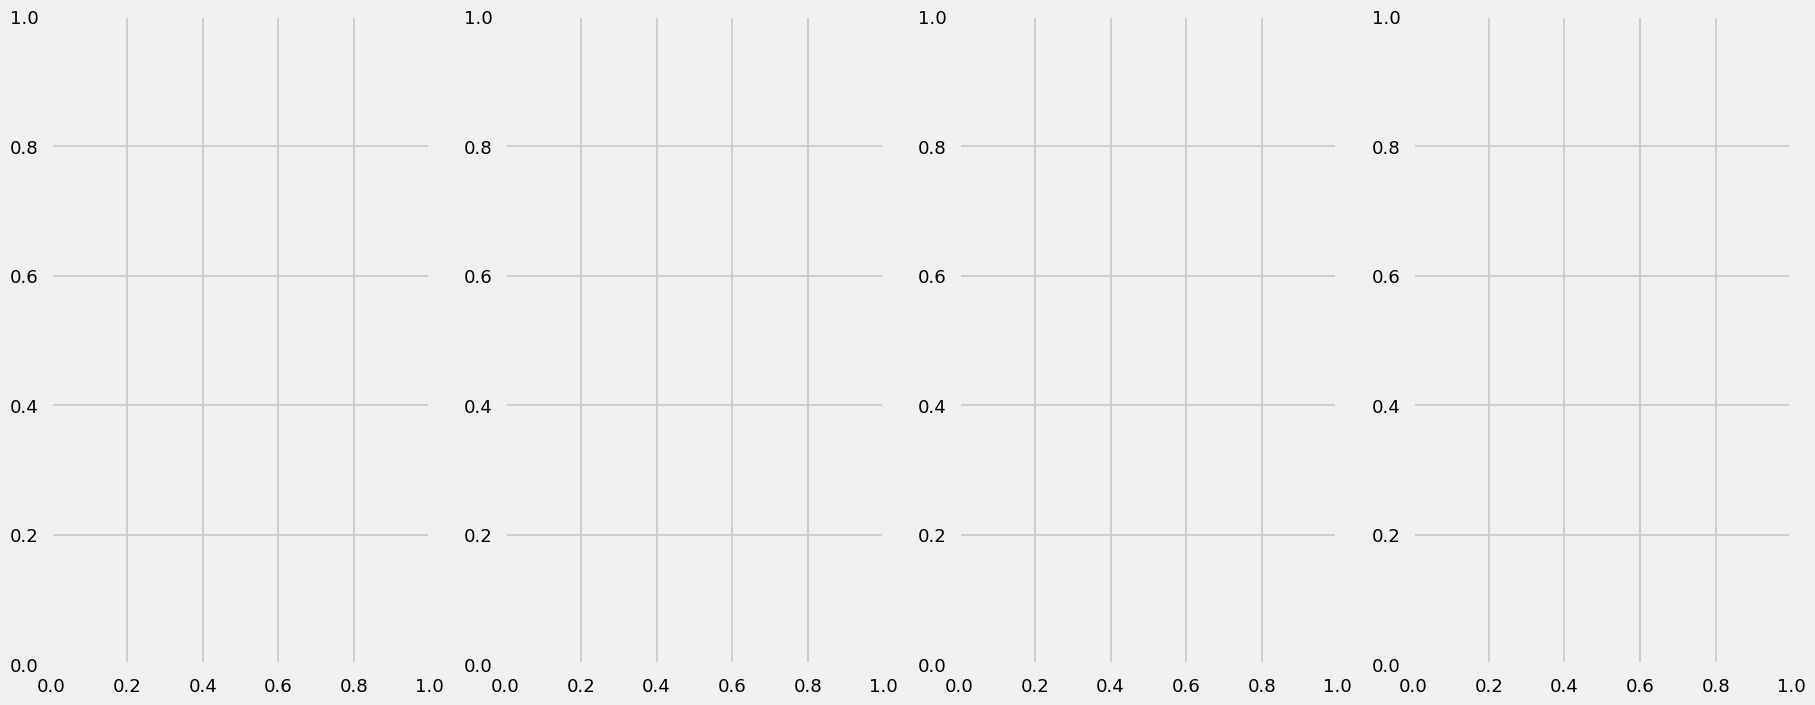

In [43]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()



plt.subplots(1,4,figsize=(20,8))
plt.subplot(141)
plt.boxplot(df["math_score"],color="skyblue")
plt.subplot(142)
plt.boxplot(df["reading_score"],color="green")
plt.sibplot(143)
plt.boxplot(df["writing_score"],color="red")
plt.subplot(144)
plt.boxplot(df["Average"],color="pink")
plt.show()

In [ ]:
sns.pairplot(df,hue="gender")
plt.show()

#### Insights

From the above plot it is clear that all the scores increase linearly with each other.

####  5. Conclusions
1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.